In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

df = pd.read_csv(url, names=columns)

In [4]:
summary = df.describe()


In [5]:
unique_species = df["species"].value_counts()


In [6]:
df.loc[5:10, 'sepal_length'] = np.nan

In [7]:
df['sepal_length'].fillna(df['sepal_length'].mean(), inplace=True)

C:\Users\mirod\AppData\Local\Temp\ipykernel_11664\3352919663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sepal_length'].fillna(df['sepal_length'].mean(), inplace=True)


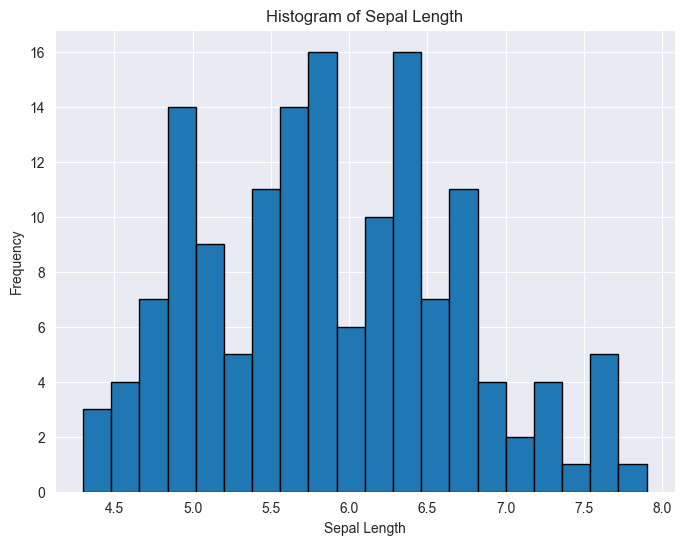

In [8]:
plt.figure(figsize=(8, 6))
df['sepal_length'].hist(bins=20, edgecolor='black')
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

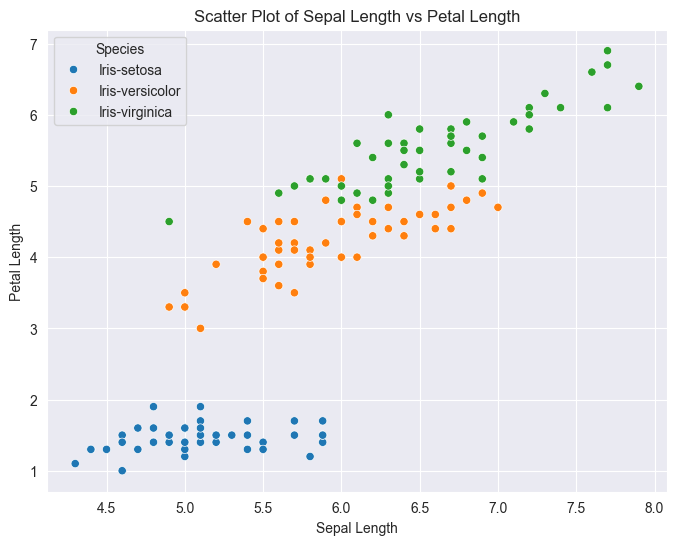

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df)
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend(title='Species')
plt.show()

In [10]:
if 'species' in df.columns:
    X = df.loc[:, df.columns != 'species']
    y = df.loc[:, 'species']
else:
    raise KeyError("The 'species' column is missing from the dataset.")

In [11]:
y = y.astype('category').cat.codes

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 1.0
